In [1]:
import os
import shutil
import random
import matplotlib.pyplot as plt

### Copy Images from Preprocessed and Generated Folders

In [2]:
src_folder = r'D:\Research\Vision\mra\root\datasets\OASIS-2\preprocessed'
des_folder = r'D:\Research\Vision\mra\root\datasets\OASIS-2\preprocessed_balanced'

if os.path.exists(des_folder):
    shutil.rmtree(des_folder)

shutil.copytree(src_folder, des_folder)

'D:\\Research\\Vision\\mra\\root\\datasets\\OASIS-2\\preprocessed_balanced'

In [3]:
src_folder = r'D:\Research\Vision\mra\root\datasets\OASIS-2\generated'
des_folder = r'D:\Research\Vision\mra\root\datasets\OASIS-2\preprocessed_balanced\train'
subfolders = ['axial', 'coronal', 'sagittal']

for subfolder in subfolders:
    src_subfolder = os.path.join(src_folder, subfolder)
    des_subfolder = os.path.join(des_folder, subfolder)
    
    for condition in os.listdir(src_subfolder):
        src_condition = os.path.join(src_subfolder, condition)
        des_condition = os.path.join(des_subfolder, condition)
        
        if os.path.isdir(src_condition):
            os.makedirs(des_condition, exist_ok=True)
            for item in os.listdir(src_condition):
                if os.path.isfile(os.path.join(src_condition, item)):
                    shutil.copy2(os.path.join(src_condition, item), os.path.join(des_condition, item))

print("Images copied successfully.")

Images copied successfully.


### Reduce Excess Samples

In [4]:
# Define the paths for both train and test datasets
datasets = ['train', 'test']
subfolders = ['axial', 'coronal', 'sagittal']

# Loop through both train and test datasets
for dataset in datasets:
    for subfolder in subfolders:
        moderate_dementia_folder = os.path.join(r'D:\Research\Vision\mra\root\datasets\OASIS-2\preprocessed_balanced', dataset, subfolder, 'moderate_dementia')
        nondemented_folder = os.path.join(r'D:\Research\Vision\mra\root\datasets\OASIS-2\preprocessed_balanced', dataset, subfolder, 'nondemented')

        # Count the number of images in 'moderate_dementia'
        moderate_dementia_images = []
        for f in os.listdir(moderate_dementia_folder):
            if os.path.isfile(os.path.join(moderate_dementia_folder, f)):
                moderate_dementia_images.append(f)
        num_moderate_dementia = len(moderate_dementia_images)

        # List all images in 'nondemented' folder
        nondemented_images = []
        for f in os.listdir(nondemented_folder):
            if os.path.isfile(os.path.join(nondemented_folder, f)):
                nondemented_images.append(f)

        # If there are more images in 'nondemented' than needed, reduce it by deleting extra images
        if len(nondemented_images) > num_moderate_dementia:
            if dataset=='train':
                excess_images = len(nondemented_images) - num_moderate_dementia
            elif dataset=='test':
                excess_images = len(nondemented_images) - num_moderate_dementia * 8
                
            random.shuffle(nondemented_images)

            # Delete the excess images
            for i in range(excess_images):
                image_to_delete = os.path.join(nondemented_folder, nondemented_images[i])
                os.remove(image_to_delete)

            print(f"Deleted {excess_images} excess images from '{dataset}/{subfolder}/nondemented'.")
        else:
            print(f"No need to delete any images in '{dataset}/{subfolder}/nondemented'.")

Deleted 43990 excess images from 'train/axial/nondemented'.
Deleted 37207 excess images from 'train/coronal/nondemented'.
Deleted 31777 excess images from 'train/sagittal/nondemented'.
Deleted 4393 excess images from 'test/axial/nondemented'.
Deleted 3727 excess images from 'test/coronal/nondemented'.
Deleted 3196 excess images from 'test/sagittal/nondemented'.


### Plot Train-Test Split and Class Distribution


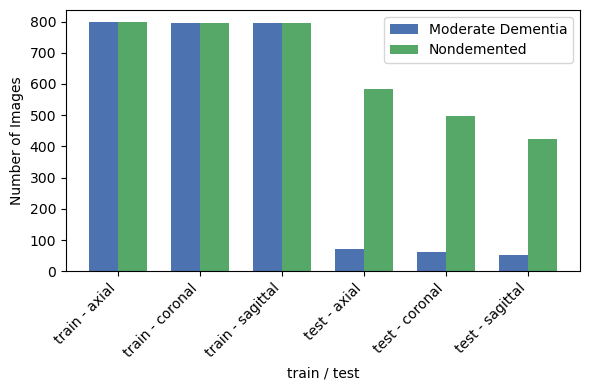

In [5]:
datasets = ['train', 'test']
subfolders = ['axial', 'coronal', 'sagittal']

labels = []
moderate_dementia_counts = []
nondemented_counts = []

for dataset in datasets:
    for subfolder in subfolders:
        moderate_dementia_folder = os.path.join(r'D:\Research\Vision\mra\root\datasets\OASIS-2\preprocessed_balanced', dataset, subfolder, 'moderate_dementia')
        nondemented_folder = os.path.join(r'D:\Research\Vision\mra\root\datasets\OASIS-2\preprocessed_balanced', dataset, subfolder, 'nondemented')

        # Count the number of images in 'moderate_dementia'
        moderate_dementia_images = []
        for f in os.listdir(moderate_dementia_folder):
            if os.path.isfile(os.path.join(moderate_dementia_folder, f)):
                moderate_dementia_images.append(f)
        num_moderate_dementia = len(moderate_dementia_images)

        # List all images in 'nondemented' folder
        nondemented_images = []
        for f in os.listdir(nondemented_folder):
            if os.path.isfile(os.path.join(nondemented_folder, f)):
                nondemented_images.append(f)

        # Store the data for plotting
        labels.append(f'{dataset} - {subfolder}')
        moderate_dementia_counts.append(num_moderate_dementia)
        nondemented_counts.append(len(nondemented_images))

# Plotting
x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))

# Create bar plots for both moderate_dementia and nondemented
ax.bar(x, moderate_dementia_counts, width, label='Moderate Dementia', color='#4C72B0')
ax.bar([i + width for i in x], nondemented_counts, width, label='Nondemented', color='#55A868')

ax.set_xlabel('train / test')
ax.set_ylabel('Number of Images')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


### Copy Images from All Planes to a Single Directory Named '3-plane'

In [6]:
def copy_images(src_base, dst_base):
    # Categories to process
    categories = ['moderate_dementia', 'nondemented']
    
    # Views to process
    views = ['axial', 'coronal', 'sagittal']

    # Iterate over each category and create destination folders
    for category in categories:
        # Create destination folder for the category inside "3-plane"
        category_dst = os.path.join(dst_base, category)
        if not os.path.exists(category_dst):
            os.makedirs(category_dst)
        
        # Iterate over each view (axial, coronal, sagittal)
        for view in views:
            view_src = os.path.join(src_base, view, category)
            if os.path.exists(view_src):
                # Iterate over all files in the view folder
                for filename in os.listdir(view_src):
                    file_path = os.path.join(view_src, filename)
                    if os.path.isfile(file_path):
                        # Move each image to the new category folder
                        shutil.copy(file_path, os.path.join(category_dst, filename))

In [7]:
paths = [
    r'D:\Research\Vision\mra\root\datasets\OASIS-2\preprocessed_balanced\train',
    r'D:\Research\Vision\mra\root\datasets\OASIS-2\preprocessed_balanced\test'
]

for path in paths:
    copy_images(path, os.path.join(path, '3-plane'))

print("Images have been successfully moved to the '3-plane' folders.")

Images have been successfully moved to the '3-plane' folders.
